In [54]:
import pandas as pd
import geopandas as gpd
import shapely.wkt
import contextily as ctx
import matplotlib.pyplot as plt
import datetime as dt
#import hvplot
#import hvplot.pandas

In [7]:
df = pd.read_csv('project-data/topic1-mobile_sensor/patrol_data.csv', sep=',')
#hd = pd.read_csv('~/project-data/huadan_shuangjing.csv', sep=',')

In [8]:
geometry = df['wktstr'].map(shapely.wkt.loads)
df = df.drop('wktstr', axis=1)

gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
gdf=gdf.drop('Unnamed: 0', axis = 1)

In [50]:
gdf['est_ts'] = pd.to_datetime(gdf['est_ts'],format='%Y-%m-%d %H:%M:%S.%f')

In [57]:
gdf = gdf.assign(session=pd.cut(gdf.est_ts.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))

In [58]:
gdf.head()

,mmac,est,humi,pm10,pm25,temp,wifi,noise,yiwei,est_ts,geometry,session
0,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:06,96.11,142.2,121.6,13.10,79,63.5,0.0129,2021-03-15 07:36:06,POINT (116.45751 39.90078),Morning
1,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:16,95.01,144.8,122.6,13.20,60,62.9,0.0124,2021-03-15 07:36:16,POINT (116.45751 39.90078),Morning
2,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:26,92.80,141.0,110.0,13.28,60,61.7,0.0084,2021-03-15 07:36:26,POINT (116.45751 39.90078),Morning
3,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:36,90.92,144.1,107.5,13.35,68,61.2,0.0070,2021-03-15 07:36:36,POINT (116.45751 39.90078),Morning
4,3a593c6b54694de5b1ffdcc82b0cdf9d,15/3/2021 07:36:46,89.60,153.2,120.9,13.43,44,61.5,0.0079,2021-03-15 07:36:46,POINT (116.45751 39.90078),Morning


In [15]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

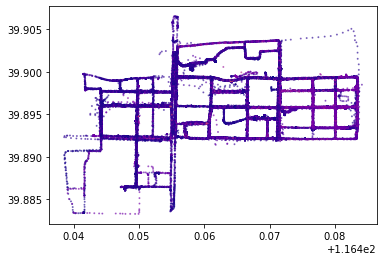

In [48]:
#gdf[gdf.pm25 < 500].hvplot(title='双井pm2.5传感器数据（20210315-20210329）', geo=True, size = 2,c='pm25', tiles='CartoLight', width=500, height=500)
ax = gdf.plot(column='pm25',cmap='plasma', markersize=1, alpha=0.5)
#ax.set_axis_off()

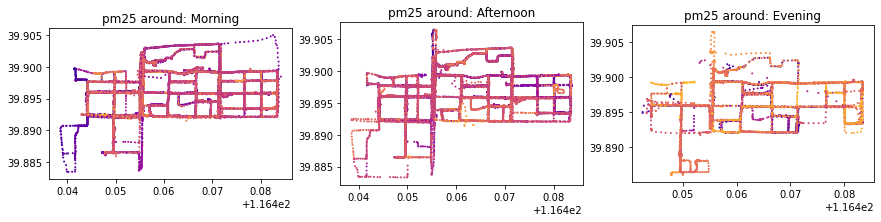

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(20, 25)  #set it big enough for all subplots

ss = ['Morning','Afternoon','Evening']
count = 0

for icol in range(axs.shape[0]):
    #print(icol, irow)
    if count<len(ss):
        # plot that session on current axes
        gdf[gdf['session'] == ss[count]].plot(column='temp', ax=axs[icol], markersize=1, cmap='plasma')
        axs[icol].set_title('pm25 around: '+ss[count])
        count +=1
    else:
        # hide extra axes
        axs[icol].set_visible(False)

plt.show()

In [79]:
gdf[gdf['session']== ss[3]]

,mmac,est,humi,pm10,pm25,temp,wifi,noise,yiwei,est_ts,geometry,session
5729,4045736caa09478c92958c40f3f90bfa,15/3/2021 19:26:25,29.71,40.6,31.0,11.70,139,78.1,0.0000,2021-03-15 19:26:25,POINT (116.46653 39.89272),Evening
5730,4045736caa09478c92958c40f3f90bfa,15/3/2021 19:26:35,29.71,47.5,36.6,11.78,110,85.7,0.0000,2021-03-15 19:26:35,POINT (116.46645 39.89218),Evening
5731,4045736caa09478c92958c40f3f90bfa,15/3/2021 19:26:45,29.67,53.3,41.7,11.84,150,87.8,0.0012,2021-03-15 19:26:45,POINT (116.46572 39.89213),Evening
5732,4045736caa09478c92958c40f3f90bfa,15/3/2021 19:26:55,29.56,52.4,41.2,11.87,150,86.3,0.0024,2021-03-15 19:26:55,POINT (116.46492 39.89217),Evening
5733,4045736caa09478c92958c40f3f90bfa,15/3/2021 19:27:05,29.49,49.6,38.3,11.93,122,84.2,0.0000,2021-03-15 19:27:05,POINT (116.46415 39.89219),Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
108980,c9638e3600b044cb9d33b331dda2e843,29/3/2021 22:42:42,58.80,51.5,38.4,16.79,47,61.8,0.0210,2021-03-29 22:42:42,POINT (116.45808 39.90073),Evening
108981,c9638e3600b044cb9d33b331dda2e843,29/3/2021 22:42:52,57.94,56.5,42.3,16.84,47,64.3,0.0218,2021-03-29 22:42:52,POINT (116.45807 39.90073),Evening
108982,c9638e3600b044cb9d33b331dda2e843,29/3/2021 22:43:02,57.37,63.7,47.6,16.89,49,63.4,0.0211,2021-03-29 22:43:02,POINT (116.45808 39.90073),Evening
108983,c9638e3600b044cb9d33b331dda2e843,29/3/2021 22:43:12,56.99,65.2,49.9,16.91,40,63.2,0.0191,2021-03-29 22:43:12,POINT (116.45812 39.90073),Evening


In [76]:
gdf[gdf['session']== ss[1]].plot(column='pm25', ax=axs[0])

<Figure size 432x288 with 0 Axes>

In [22]:
geometry = hd['geom'].map(shapely.wkt.loads)
hd = hd.drop('geom', axis=1)

ghd = gpd.GeoDataFrame(hd, crs="EPSG:4326", geometry=geometry)
#ghd=ghd.drop('Unnamed: 0', axis = 1)

In [25]:
ghd.hvplot(title='双井话单数据', geo=True, size = 2,c='number_hd', tiles='CartoLight', width=500, height=500)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (number_hd)

In [23]:
hd

,id_grid,sst_date,number_hd,work,home,age,gender,belong_city,count_hd,lon_earth,...,dis_tam,build_zone,id_countyb,nm_countyb,nm_build_z,id_city,nm_city,dis_county,id_countybz,geometry
0,116.446426_39.894919,2019-04-28 00:00:00,12345,就业非此地,居住非此地,25-44,女,北京市,1,116.446426,...,5101.484809,1.0,110105001,朝阳区建成区,建成区,110100000000,北京,2.980379,110105001,MULTIPOINT (116.44643 39.89492)
1,116.446426_39.894919,2019-05-02 00:00:00,110,就业非此地,居住非此地,25-44,女,北京市,1,116.446426,...,5101.484809,1.0,110105001,朝阳区建成区,建成区,110100000000,北京,2.980379,110105001,MULTIPOINT (116.44643 39.89492)
2,116.446426_39.894919,2019-08-02 00:00:00,110,就业非此地,居住非此地,25-44,男,吉林省,1,116.446426,...,5101.484809,1.0,110105001,朝阳区建成区,建成区,110100000000,北京,2.980379,110105001,MULTIPOINT (116.44643 39.89492)
3,116.446426_39.894919,2019-10-27 00:00:00,12345,就业非此地,居住非此地,>60,男,北京市,1,116.446426,...,5101.484809,1.0,110105001,朝阳区建成区,建成区,110100000000,北京,2.980379,110105001,MULTIPOINT (116.44643 39.89492)
4,116.446426_39.894919,2019-11-07 00:00:00,12345,就业非此地,居住非此地,>60,男,北京市,1,116.446426,...,5101.484809,1.0,110105001,朝阳区建成区,建成区,110100000000,北京,2.980379,110105001,MULTIPOINT (116.44643 39.89492)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33103,116.450697_39.892583,2019-12-16 00:00:00,119,就业非此地,居住非此地,45-60,男,内蒙古自治区,1,116.450697,...,4777.038101,1.0,110105001,朝阳区建成区,建成区,110100000000,北京,2.833488,110105001,MULTIPOINT (116.45070 39.89258)
33104,116.450697_39.892583,2019-12-16 00:00:00,12315,就业非此地,居住非北京,25-44,男,邢台市,1,116.450697,...,4777.038101,1.0,110105001,朝阳区建成区,建成区,110100000000,北京,2.833488,110105001,MULTIPOINT (116.45070 39.89258)
33105,116.450697_39.892583,2019-12-23 00:00:00,96777,就业非此地,居住非此地,19-24,女,北京市,1,116.450697,...,4777.038101,1.0,110105001,朝阳区建成区,建成区,110100000000,北京,2.833488,110105001,MULTIPOINT (116.45070 39.89258)
33106,116.450697_39.892583,2019-12-31 00:00:00,96777,就业非此地,居住非此地,25-44,男,北京市,1,116.450697,...,4777.038101,1.0,110105001,朝阳区建成区,建成区,110100000000,北京,2.833488,110105001,MULTIPOINT (116.45070 39.89258)


In [26]:
hd.number_hd.value_counts()

110         8032
12345       6427
122         5627
96777       4620
12315       2305
120         1892
96116       1543
96069        986
12320        434
119          387
96310        323
999          278
12369        231
12350         12
69738604      11
Name: number_hd, dtype: int64

<AxesSubplot:>

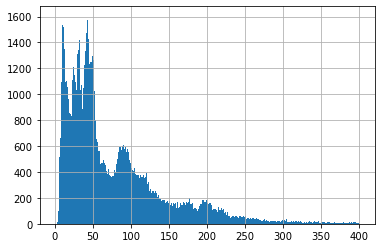

In [14]:
gdf[gdf.pm25 < 500]['pm25'].hist(bins=400)

In [8]:
gdf['est_ts'] = pd.to_datetime(gdf['est_ts'])
gdf = gdf.set_index('est_ts').tz_localize(None)

In [11]:
gdf['Y-M'] = gdf.index.to_period('M')
gdf['Y-M-D'] = gdf.index.to_period('D')

In [14]:
gdf.index.to_period('W')

PeriodIndex(['2021-03-15/2021-03-21', '2021-03-15/2021-03-21',
             '2021-03-15/2021-03-21', '2021-03-15/2021-03-21',
             '2021-03-15/2021-03-21', '2021-03-15/2021-03-21',
             '2021-03-15/2021-03-21', '2021-03-15/2021-03-21',
             '2021-03-15/2021-03-21', '2021-03-15/2021-03-21',
             ...
             '2021-03-29/2021-04-04', '2021-03-29/2021-04-04',
             '2021-03-29/2021-04-04', '2021-03-29/2021-04-04',
             '2021-03-29/2021-04-04', '2021-03-29/2021-04-04',
             '2021-03-29/2021-04-04', '2021-03-29/2021-04-04',
             '2021-03-29/2021-04-04', '2021-03-29/2021-04-04'],
            dtype='period[W-SUN]', name='est_ts', length=108985, freq='W-SUN')